# Table of Contents
1. [1/5/1996-3/27/2015 Model](#Model-uses-1/5/1996---3/27/2015,-need-to-find-new-parameters,-but-use-same-3-variables)
 1. [MLR and RDF Models](#Model-Creations)
1. [Model with the Addition of Urea Inventory](#This-is-the-new-part-where-I-add-Urea_Inventory)

## Model uses 1/5/1996 - 3/27/2015, need to find new parameters, but use same 3 variables
[Top](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureascenariostimemachine.csv")
#model part
df_96on = data[['Date','Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same','Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change','Urea']][0:1004]
df_96on.tail()

,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea
999,2/27/2015,52.14,393.25,71.05,218000,52.14,393.25,71.05,218000,317
1000,3/6/2015,51.47,386.00,65.50,219000,51.47,386.00,65.50,219000,310
1001,3/13/2015,47.06,380.50,64.95,219000,47.06,380.50,64.95,219000,298
1002,3/20/2015,46.57,392.75,64.05,219000,46.57,392.75,64.05,219000,298
1003,3/27/2015,50.50,399.00,63.30,219000,50.50,399.00,63.30,219000,298


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date                     datetime64[ns]
Crude_Same                      float64
Corn_Same                       float64
Coal_Same                       float64
Urea_Inventory_Same             float64
Crude_Change                    float64
Corn_Change                     float64
Coal_Change                     float64
Urea_Inventory_Change           float64
Urea                            float64
dtype: object

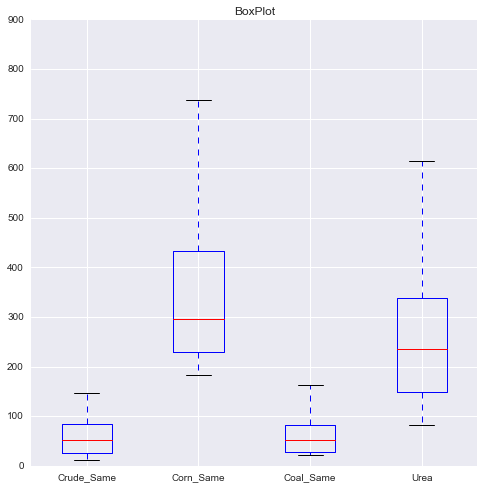

In [4]:
plt.show(df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))
#no apparent outliers

In [3]:
df_96on.corr()

,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea
Crude_Same,1.000000,0.782858,0.896400,-0.620946,1.000000,0.782858,0.896400,-0.620946,0.874776
Corn_Same,0.782858,1.000000,0.836953,-0.367348,0.782858,1.000000,0.836953,-0.367348,0.801983
Coal_Same,0.896400,0.836953,1.000000,-0.471507,0.896400,0.836953,1.000000,-0.471507,0.884740
Urea_Inventory_Same,-0.620946,-0.367348,-0.471507,1.000000,-0.620946,-0.367348,-0.471507,1.000000,-0.528116
Crude_Change,1.000000,0.782858,0.896400,-0.620946,1.000000,0.782858,0.896400,-0.620946,0.874776
Corn_Change,0.782858,1.000000,0.836953,-0.367348,0.782858,1.000000,0.836953,-0.367348,0.801983
Coal_Change,0.896400,0.836953,1.000000,-0.471507,0.896400,0.836953,1.000000,-0.471507,0.884740
Urea_Inventory_Change,-0.620946,-0.367348,-0.471507,1.000000,-0.620946,-0.367348,-0.471507,1.000000,-0.528116
Urea,0.874776,0.801983,0.884740,-0.528116,0.874776,0.801983,0.884740,-0.528116,1.000000


### Model Creations 
[Top](#table-of-contents)

In [4]:
#MLR model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1567.
Date:                Wed, 04 May 2016   Prob (F-statistic):               0.00
Time:                        12:21:25   Log-Likelihood:                -5504.9
No. Observations:                1004   AIC:                         1.102e+04
Df Residuals:                    1000   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.7721      4.587      4.529      0.000        11.771    29.773
Crude_Same     1.6896      0.131     12.891      0.000         1.432     1.947
Corn_Same      0.1407      0.021      6.673      0.000         0.099     0.182
Coal_Same      1.6112      0.138     11.662      0.000         1.340     1.882
==============================================================================
Omnibus:                      323.498   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1823.713
Skew:                           1.363   Prob(JB):                         0.00
Kurtosis:                       9.014   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#find RDF with new parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [11]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [7]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 315.336, test: 592.244
R^2 train: 0.985, test: 0.964
[ 0.61055484  0.09334631  0.29609885]


In [8]:
#this part of models prediction same for urea_pred_crudechange, crudedown, cornchange, coalchange
#crude
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_CrudeChange_RDF'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_CrudeChange_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error'] = rdf_error3

#corn
urea_predicted5 = forest.predict(X)
urea_predicted5 = pd.DataFrame(urea_predicted5)
df_96on['Urea_Pred_CornChange_RDF'] = urea_predicted5

#coal
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_Pred_CoalChange_RDF'] = urea_predicted7

#same
urea_predicted9 = forest.predict(X)
urea_predicted9 = pd.DataFrame(urea_predicted9)
df_96on['Urea_Pred_Same_RDF'] = urea_predicted9

print("Average RDF error is: %.3f" % (rdf_error3.mean()))
df_96on

Average RDF error is: 5.178


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea,Urea_Pred_CrudeChange_RDF,RDF_Error,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,1996-01-05,19.65,369.75,25.358912,19.65,369.75,25.358912,220,200.599040,8.818618,200.599040,200.599040,200.599040
1,1996-01-12,17.98,366.25,25.269689,17.98,366.25,25.269689,220,213.193333,3.093939,213.193333,213.193333,213.193333
2,1996-01-19,18.25,365.00,29.070713,18.25,365.00,29.070713,218,200.091667,8.214832,200.091667,200.091667,200.091667
3,1996-01-26,17.36,360.25,29.195096,17.36,360.25,29.195096,215,194.051667,9.743411,194.051667,194.051667,194.051667
4,1996-02-02,17.38,370.50,32.105527,17.38,370.50,32.105527,205,193.385000,5.665854,193.385000,193.385000,193.385000
5,1996-02-09,17.38,367.25,28.667889,17.38,367.25,28.667889,205,195.405000,4.680488,195.405000,195.405000,195.405000
6,1996-02-16,18.40,382.75,28.169393,18.40,382.75,28.169393,210,198.588333,5.434127,198.588333,198.588333,198.588333
7,1996-02-23,18.45,383.50,28.828182,18.45,383.50,28.828182,210,201.735000,3.935714,201.735000,201.735000,201.735000
8,1996-03-01,18.62,386.75,27.863549,18.62,386.75,27.863549,210,194.163889,7.541005,194.163889,194.163889,194.163889
9,1996-03-08,18.87,388.50,26.513218,18.87,388.50,26.513218,205,189.399524,7.609988,189.399524,189.399524,189.399524


In [9]:
#predictions part
newpred = data[['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change']][1004:1056]
newpred2 = data[['Crude_Change','Corn_Same','Coal_Same']][1004:1056]
newpred4 = data[['Crude_Same','Corn_Change','Coal_Same']][1004:1056]
newpred6 = data[['Crude_Same','Corn_Same','Coal_Change']][1004:1056]
newpred8 = data[['Crude_Same','Corn_Same','Coal_Same']][1004:1056]

In [10]:
#new predictions
X = df_96on[['Crude_Change','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Urea_Pred_CrudeChange_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 302.395, test: 588.985
R^2 train: 0.985, test: 0.964
[ 0.64391418  0.08170785  0.27437797]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF
0,2015-04-03,50.5,399,63.3,58.6954,398.287,60.0608,303.645098
1,2015-04-10,50.5,399,63.3,51.967,385.665,59.2559,299.002387
2,2015-04-17,50.5,399,63.3,56.3333,370.733,60.7246,304.666831
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,303.645098
4,2015-05-01,50.5,399,63.3,60.4146,359.174,59.9545,301.074324
5,2015-05-08,50.5,399,63.3,59.3338,359.244,59.636,301.031150
6,2015-05-15,50.5,399,63.3,59.6824,362.414,59.6727,301.031150
7,2015-05-22,50.5,399,63.3,60.4521,366.09,59.2671,301.074324
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,301.074324
9,2015-06-05,50.5,399,63.3,60.0134,365.58,60.1182,301.394324


In [11]:
X = df_96on[['Crude_Same','Corn_Change','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Urea_Pred_CornChange_RDF'] = df_new_pred3

newpred

MSE train: 293.259, test: 619.083
R^2 train: 0.986, test: 0.962
[ 0.56520831  0.09932054  0.33547115]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF
0,2015-04-03,50.5,399,63.3,58.6954,398.287,60.0608,303.645098,300.698752
1,2015-04-10,50.5,399,63.3,51.967,385.665,59.2559,299.002387,297.400868
2,2015-04-17,50.5,399,63.3,56.3333,370.733,60.7246,304.666831,296.065208
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,303.645098,296.065208
4,2015-05-01,50.5,399,63.3,60.4146,359.174,59.9545,301.074324,289.364889
5,2015-05-08,50.5,399,63.3,59.3338,359.244,59.636,301.031150,289.364889
6,2015-05-15,50.5,399,63.3,59.6824,362.414,59.6727,301.031150,294.485926
7,2015-05-22,50.5,399,63.3,60.4521,366.09,59.2671,301.074324,294.618541
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,301.074324,287.502154
9,2015-06-05,50.5,399,63.3,60.0134,365.58,60.1182,301.394324,294.618541


In [12]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Change']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Urea_Pred_CoalChange_RDF'] = df_new_pred5

newpred

MSE train: 324.413, test: 596.997
R^2 train: 0.984, test: 0.964
[ 0.63043407  0.08620163  0.2833643 ]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF
0,2015-04-03,50.5,399,63.3,58.6954,398.287,60.0608,303.645098,300.698752,319.800576
1,2015-04-10,50.5,399,63.3,51.967,385.665,59.2559,299.002387,297.400868,318.879243
2,2015-04-17,50.5,399,63.3,56.3333,370.733,60.7246,304.666831,296.065208,319.841801
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,303.645098,296.065208,318.628280
4,2015-05-01,50.5,399,63.3,60.4146,359.174,59.9545,301.074324,289.364889,318.879243
5,2015-05-08,50.5,399,63.3,59.3338,359.244,59.636,301.031150,289.364889,318.879243
6,2015-05-15,50.5,399,63.3,59.6824,362.414,59.6727,301.031150,294.485926,318.879243
7,2015-05-22,50.5,399,63.3,60.4521,366.09,59.2671,301.074324,294.618541,318.879243
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,301.074324,287.502154,319.800576
9,2015-06-05,50.5,399,63.3,60.0134,365.58,60.1182,301.394324,294.618541,319.800576


In [13]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted7 = forest.predict(newpred8)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['Urea_Pred_Same_RDF'] = df_new_pred7

newpred

MSE train: 293.035, test: 596.269
R^2 train: 0.986, test: 0.964
[ 0.58619696  0.09132884  0.3224742 ]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,2015-04-03,50.5,399,63.3,58.6954,398.287,60.0608,303.645098,300.698752,319.800576,301.3315
1,2015-04-10,50.5,399,63.3,51.967,385.665,59.2559,299.002387,297.400868,318.879243,301.3315
2,2015-04-17,50.5,399,63.3,56.3333,370.733,60.7246,304.666831,296.065208,319.841801,301.3315
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,303.645098,296.065208,318.628280,301.3315
4,2015-05-01,50.5,399,63.3,60.4146,359.174,59.9545,301.074324,289.364889,318.879243,301.3315
5,2015-05-08,50.5,399,63.3,59.3338,359.244,59.636,301.031150,289.364889,318.879243,301.3315
6,2015-05-15,50.5,399,63.3,59.6824,362.414,59.6727,301.031150,294.485926,318.879243,301.3315
7,2015-05-22,50.5,399,63.3,60.4521,366.09,59.2671,301.074324,294.618541,318.879243,301.3315
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,301.074324,287.502154,319.800576,301.3315
9,2015-06-05,50.5,399,63.3,60.0134,365.58,60.1182,301.394324,294.618541,319.800576,301.3315


In [14]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined

,Coal_Change,Coal_Same,Corn_Change,Corn_Same,Crude_Change,Crude_Same,Date,RDF_Error,Urea,Urea_Pred_CoalChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CrudeChange_RDF,Urea_Pred_Same_RDF
0,25.3589,25.3589,369.75,369.75,19.65,19.65,1996-01-05,8.818618,220,200.599040,200.599040,200.599040,200.599040
1,25.2697,25.2697,366.25,366.25,17.98,17.98,1996-01-12,3.093939,220,213.193333,213.193333,213.193333,213.193333
2,29.0707,29.0707,365,365,18.25,18.25,1996-01-19,8.214832,218,200.091667,200.091667,200.091667,200.091667
3,29.1951,29.1951,360.25,360.25,17.36,17.36,1996-01-26,9.743411,215,194.051667,194.051667,194.051667,194.051667
4,32.1055,32.1055,370.5,370.5,17.38,17.38,1996-02-02,5.665854,205,193.385000,193.385000,193.385000,193.385000
5,28.6679,28.6679,367.25,367.25,17.38,17.38,1996-02-09,4.680488,205,195.405000,195.405000,195.405000,195.405000
6,28.1694,28.1694,382.75,382.75,18.4,18.4,1996-02-16,5.434127,210,198.588333,198.588333,198.588333,198.588333
7,28.8282,28.8282,383.5,383.5,18.45,18.45,1996-02-23,3.935714,210,201.735000,201.735000,201.735000,201.735000
8,27.8635,27.8635,386.75,386.75,18.62,18.62,1996-03-01,7.541005,210,194.163889,194.163889,194.163889,194.163889
9,26.5132,26.5132,388.5,388.5,18.87,18.87,1996-03-08,7.609988,205,189.399524,189.399524,189.399524,189.399524


In [15]:
combined = combined[['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_Same_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_Same_RDF']
combined

,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,1996-01-05 00:00:00,19.65,369.75,25.3589,19.65,369.75,25.3589,220,200.599,200.599,200.599,200.599
1,1996-01-12 00:00:00,17.98,366.25,25.2697,17.98,366.25,25.2697,220,213.193,213.193,213.193,213.193
2,1996-01-19 00:00:00,18.25,365,29.0707,18.25,365,29.0707,218,200.092,200.092,200.092,200.092
3,1996-01-26 00:00:00,17.36,360.25,29.1951,17.36,360.25,29.1951,215,194.052,194.052,194.052,194.052
4,1996-02-02 00:00:00,17.38,370.5,32.1055,17.38,370.5,32.1055,205,193.385,193.385,193.385,193.385
5,1996-02-09 00:00:00,17.38,367.25,28.6679,17.38,367.25,28.6679,205,195.405,195.405,195.405,195.405
6,1996-02-16 00:00:00,18.4,382.75,28.1694,18.4,382.75,28.1694,210,198.588,198.588,198.588,198.588
7,1996-02-23 00:00:00,18.45,383.5,28.8282,18.45,383.5,28.8282,210,201.735,201.735,201.735,201.735
8,1996-03-01 00:00:00,18.62,386.75,27.8635,18.62,386.75,27.8635,210,194.164,194.164,194.164,194.164
9,1996-03-08 00:00:00,18.87,388.5,26.5132,18.87,388.5,26.5132,205,189.4,189.4,189.4,189.4


In [16]:
combined.to_csv("C:/Users/msteinme/Documents/ureascenariotimemachineresults2.csv")

## This is the new part where I add Urea_Inventory
[Top](#Table-of-contents)

In [4]:
#MLR model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 05 May 2016   Prob (F-statistic):               0.00
Time:                        12:31:58   Log-Likelihood:                -5497.4
No. Observations:                1004   AIC:                         1.100e+04
Df Residuals:                     999   BIC:                         1.103e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  53.0882      9.504      5.586      0.000        34.438    71.738
Crude_Same              1.3822      0.152      9.068      0.000         1.083     1.681
Corn_Same               0.1527      0.021      7.214      0.000         0.111     0.194
Coal_Same               1.6911      0.139     12.188      0.000         1.419     1.963
Urea_Inventory_Same -6.278e-05   1.62e-05     -3.874      0.000     -9.46e-05  -3.1e-05
==============================================================================
Omnibus:                      326.317   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1802.562
Skew:                           1.383   Prob(JB):                         0.00
Kurtosis:                       8.953   Cond. No.                     2.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
#find RDF with new parameters urea_inv
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [4]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [9]:
#do multiple times to see what parameters are the best
rdf_model_ureaall2 = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [5]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 175.781, test: 422.736
R^2 train: 0.991, test: 0.974
[ 0.60305192  0.08272303  0.27226605  0.04195901]


In [6]:
#this part of models prediction same for urea_pred_crudechange, crudedown, cornchange, coalchange
#crude
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_CrudeChange_RDF'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_CrudeChange_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error'] = rdf_error3

#corn
urea_predicted5 = forest.predict(X)
urea_predicted5 = pd.DataFrame(urea_predicted5)
df_96on['Urea_Pred_CornChange_RDF'] = urea_predicted5

#coal
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_Pred_CoalChange_RDF'] = urea_predicted7

#urea_inventory

urea_predicted10 = forest.predict(X)
urea_predicted10 = pd.DataFrame(urea_predicted10)
df_96on['Urea_Pred_UreaInvChange_RDF'] = urea_predicted10

#same
urea_predicted9 = forest.predict(X)
urea_predicted9 = pd.DataFrame(urea_predicted9)
df_96on['Urea_Pred_Same_RDF'] = urea_predicted9

#all changed
urea_predicted20 = forest.predict(X)
urea_predicted20 = pd.DataFrame(urea_predicted20)
df_96on['Urea_Pred_Different_RDF'] = urea_predicted20

print("Average RDF error is: %.3f" % (rdf_error3.mean()))
df_96on

Average RDF error is: 4.260


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea,Urea_Pred_CrudeChange_RDF,RDF_Error,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_UreaInvChange_RDF,Urea_Pred_Same_RDF,Urea_Pred_Different_RDF
0,1996-01-05,19.65,369.75,25.358912,589898.9899,19.65,369.75,25.358912,589898.9899,220,202.979867,7.736424,202.979867,202.979867,202.979867,202.979867,202.979867
1,1996-01-12,17.98,366.25,25.269689,589898.9899,17.98,366.25,25.269689,589898.9899,220,208.518519,5.218855,208.518519,208.518519,208.518519,208.518519,208.518519
2,1996-01-19,18.25,365.00,29.070713,589898.9899,18.25,365.00,29.070713,589898.9899,218,198.655185,8.873768,198.655185,198.655185,198.655185,198.655185,198.655185
3,1996-01-26,17.36,360.25,29.195096,589898.9899,17.36,360.25,29.195096,589898.9899,215,196.088519,8.796038,196.088519,196.088519,196.088519,196.088519,196.088519
4,1996-02-02,17.38,370.50,32.105527,609090.9091,17.38,370.50,32.105527,609090.9091,205,197.738889,3.542005,197.738889,197.738889,197.738889,197.738889,197.738889
5,1996-02-09,17.38,367.25,28.667889,609090.9091,17.38,367.25,28.667889,609090.9091,205,197.087037,3.859982,197.087037,197.087037,197.087037,197.087037,197.087037
6,1996-02-16,18.40,382.75,28.169393,609090.9091,18.40,382.75,28.169393,609090.9091,210,194.076111,7.582804,194.076111,194.076111,194.076111,194.076111,194.076111
7,1996-02-23,18.45,383.50,28.828182,609090.9091,18.45,383.50,28.828182,609090.9091,210,199.591667,4.956349,199.591667,199.591667,199.591667,199.591667,199.591667
8,1996-03-01,18.62,386.75,27.863549,681818.1818,18.62,386.75,27.863549,681818.1818,210,197.805238,5.807029,197.805238,197.805238,197.805238,197.805238,197.805238
9,1996-03-08,18.87,388.50,26.513218,681818.1818,18.87,388.50,26.513218,681818.1818,205,192.295778,6.197182,192.295778,192.295778,192.295778,192.295778,192.295778


In [7]:
#predictions part
newpred = data[['Date','Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same','Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change']][1004:1056]
newpred2 = data[['Crude_Change','Corn_Same','Coal_Same','Urea_Inventory_Same']][1004:1056]
newpred4 = data[['Crude_Same','Corn_Change','Coal_Same','Urea_Inventory_Same']][1004:1056]
newpred6 = data[['Crude_Same','Corn_Same','Coal_Change','Urea_Inventory_Same']][1004:1056]
newpred7 = data[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Change']][1004:1056]
newpred8 = data[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same']][1004:1056]
newpred20 = data[['Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change']][1004:1056]

In [8]:
#new predictions
X = df_96on[['Crude_Change','Corn_Same','Coal_Same','Urea_Inventory_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same','Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Urea_Pred_CrudeChange_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 170.334, test: 420.223
R^2 train: 0.992, test: 0.974
[ 0.56511425  0.08432966  0.30882987  0.04172623]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491


In [9]:
X = df_96on[['Crude_Same','Corn_Change','Coal_Same','Urea_Inventory_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Urea_Pred_CornChange_RDF'] = df_new_pred3

newpred

MSE train: 180.599, test: 431.708
R^2 train: 0.991, test: 0.974
[ 0.60822159  0.09145454  0.25890228  0.04142158]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990,302.673779
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714,300.009878
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788,295.710045
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990,295.878934
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157,291.640156
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808,291.640156
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046,295.471823
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157,295.878934
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157,291.640156
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491,295.878934


In [10]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Change','Urea_Inventory_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Urea_Pred_CoalChange_RDF'] = df_new_pred5

newpred

MSE train: 187.772, test: 425.567
R^2 train: 0.991, test: 0.974
[ 0.64900029  0.07836782  0.22935405  0.04327785]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990,302.673779,313.700634
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714,300.009878,313.467300
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788,295.710045,313.517411
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990,295.878934,313.313967
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157,291.640156,313.467300
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808,291.640156,313.467300
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046,295.471823,313.467300
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157,295.878934,313.467300
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157,291.640156,313.700634
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491,295.878934,313.620634


In [11]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted7 = forest.predict(newpred8)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['Urea_Pred_Same_RDF'] = df_new_pred7

newpred

MSE train: 209.493, test: 441.453
R^2 train: 0.990, test: 0.973
[ 0.57931775  0.08712972  0.29279089  0.04076164]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990,302.673779,313.700634,303.636416
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714,300.009878,313.467300,303.636416
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788,295.710045,313.517411,303.636416
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990,295.878934,313.313967,303.636416
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157,291.640156,313.467300,303.636416
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808,291.640156,313.467300,303.636416
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046,295.471823,313.467300,303.636416
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157,295.878934,313.467300,303.636416
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157,291.640156,313.700634,303.636416
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491,295.878934,313.620634,303.636416


In [12]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Change']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted8 = forest.predict(newpred7)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['Urea_Pred_UreaInvChange_RDF'] = df_new_pred8

newpred

MSE train: 185.091, test: 418.706
R^2 train: 0.991, test: 0.974
[ 0.57018436  0.08830444  0.29905431  0.04245689]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF,Urea_Pred_UreaInvChange_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990,302.673779,313.700634,303.636416,310.605535
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714,300.009878,313.467300,303.636416,310.605535
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788,295.710045,313.517411,303.636416,310.605535
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990,295.878934,313.313967,303.636416,310.605535
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157,291.640156,313.467300,303.636416,314.757513
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808,291.640156,313.467300,303.636416,314.757513
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046,295.471823,313.467300,303.636416,314.757513
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157,295.878934,313.467300,303.636416,314.757513
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157,291.640156,313.700634,303.636416,314.757513
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491,295.878934,313.620634,303.636416,314.757513


In [13]:
X = df_96on[['Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted20 = forest.predict(newpred20)
df_new_pred20 = pd.DataFrame(newpred_predicted20)
newpred['Urea_Pred_Different_RDF'] = df_new_pred20

newpred

MSE train: 173.399, test: 428.836
R^2 train: 0.992, test: 0.974
[ 0.6420065   0.07832098  0.23615062  0.0435219 ]


,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF,Urea_Pred_UreaInvChange_RDF,Urea_Pred_Different_RDF
0,2015-04-03,50.5,399,63.3,219000,58.6954,398.287,60.0608,169000,299.280990,302.673779,313.700634,303.636416,310.605535,312.741404
1,2015-04-10,50.5,399,63.3,219000,51.967,385.665,59.2559,169000,301.845714,300.009878,313.467300,303.636416,310.605535,318.978785
2,2015-04-17,50.5,399,63.3,219000,56.3333,370.733,60.7246,169000,301.732788,295.710045,313.517411,303.636416,310.605535,309.719247
3,2015-04-24,50.5,399,63.3,219000,58.9,369.75,58.55,169000,299.280990,295.878934,313.313967,303.636416,310.605535,300.757735
4,2015-05-01,50.5,399,63.3,219000,60.4146,359.174,59.9545,157000,294.066157,291.640156,313.467300,303.636416,314.757513,283.543133
5,2015-05-08,50.5,399,63.3,219000,59.3338,359.244,59.636,157000,296.235808,291.640156,313.467300,303.636416,314.757513,287.319474
6,2015-05-15,50.5,399,63.3,219000,59.6824,362.414,59.6727,157000,294.705046,295.471823,313.467300,303.636416,314.757513,292.642371
7,2015-05-22,50.5,399,63.3,219000,60.4521,366.09,59.2671,157000,294.066157,295.878934,313.467300,303.636416,314.757513,291.644117
8,2015-05-29,50.5,399,63.3,219000,60.6,357.25,60.05,157000,294.066157,291.640156,313.700634,303.636416,314.757513,283.523133
9,2015-06-05,50.5,399,63.3,219000,60.0134,365.58,60.1182,137000,294.579491,295.878934,313.620634,303.636416,314.757513,293.148561


In [14]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined

,Coal_Change,Coal_Same,Corn_Change,Corn_Same,Crude_Change,Crude_Same,Date,RDF_Error,Urea,Urea_Inventory_Change,Urea_Inventory_Same,Urea_Pred_CoalChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CrudeChange_RDF,Urea_Pred_Different_RDF,Urea_Pred_Same_RDF,Urea_Pred_UreaInvChange_RDF
0,25.3589,25.3589,369.75,369.75,19.65,19.65,1996-01-05,7.736424,220,589899,589899,202.979867,202.979867,202.979867,202.979867,202.979867,202.979867
1,25.2697,25.2697,366.25,366.25,17.98,17.98,1996-01-12,5.218855,220,589899,589899,208.518519,208.518519,208.518519,208.518519,208.518519,208.518519
2,29.0707,29.0707,365,365,18.25,18.25,1996-01-19,8.873768,218,589899,589899,198.655185,198.655185,198.655185,198.655185,198.655185,198.655185
3,29.1951,29.1951,360.25,360.25,17.36,17.36,1996-01-26,8.796038,215,589899,589899,196.088519,196.088519,196.088519,196.088519,196.088519,196.088519
4,32.1055,32.1055,370.5,370.5,17.38,17.38,1996-02-02,3.542005,205,609091,609091,197.738889,197.738889,197.738889,197.738889,197.738889,197.738889
5,28.6679,28.6679,367.25,367.25,17.38,17.38,1996-02-09,3.859982,205,609091,609091,197.087037,197.087037,197.087037,197.087037,197.087037,197.087037
6,28.1694,28.1694,382.75,382.75,18.4,18.4,1996-02-16,7.582804,210,609091,609091,194.076111,194.076111,194.076111,194.076111,194.076111,194.076111
7,28.8282,28.8282,383.5,383.5,18.45,18.45,1996-02-23,4.956349,210,609091,609091,199.591667,199.591667,199.591667,199.591667,199.591667,199.591667
8,27.8635,27.8635,386.75,386.75,18.62,18.62,1996-03-01,5.807029,210,681818,681818,197.805238,197.805238,197.805238,197.805238,197.805238,197.805238
9,26.5132,26.5132,388.5,388.5,18.87,18.87,1996-03-08,6.197182,205,681818,681818,192.295778,192.295778,192.295778,192.295778,192.295778,192.295778


In [19]:
combined = combined[['Date','Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same','Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_UreaInvChange_RDF','Urea_Pred_Same_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Urea_Inventory_Same','Crude_Change','Corn_Change','Coal_Change','Urea_Inventory_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_UreaInvChange_RDF','Urea_Pred_Same_RDF']
combined

,Date,Crude_Same,Corn_Same,Coal_Same,Urea_Inventory_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Inventory_Change,Urea,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_UreaInvChange_RDF,Urea_Pred_Same_RDF
0,1996-01-05 00:00:00,19.65,369.75,25.3589,589899,19.65,369.75,25.3589,589899,220,204.104,204.104,204.104,204.104,204.104
1,1996-01-12 00:00:00,17.98,366.25,25.2697,589899,17.98,366.25,25.2697,589899,220,209.773,209.773,209.773,209.773,209.773
2,1996-01-19 00:00:00,18.25,365,29.0707,589899,18.25,365,29.0707,589899,218,196.685,196.685,196.685,196.685,196.685
3,1996-01-26 00:00:00,17.36,360.25,29.1951,589899,17.36,360.25,29.1951,589899,215,190.875,190.875,190.875,190.875,190.875
4,1996-02-02 00:00:00,17.38,370.5,32.1055,609091,17.38,370.5,32.1055,609091,205,193.332,193.332,193.332,193.332,193.332
5,1996-02-09 00:00:00,17.38,367.25,28.6679,609091,17.38,367.25,28.6679,609091,205,193.545,193.545,193.545,193.545,193.545
6,1996-02-16 00:00:00,18.4,382.75,28.1694,609091,18.4,382.75,28.1694,609091,210,193.745,193.745,193.745,193.745,193.745
7,1996-02-23 00:00:00,18.45,383.5,28.8282,609091,18.45,383.5,28.8282,609091,210,198.405,198.405,198.405,198.405,198.405
8,1996-03-01 00:00:00,18.62,386.75,27.8635,681818,18.62,386.75,27.8635,681818,210,196.169,196.169,196.169,196.169,196.169
9,1996-03-08 00:00:00,18.87,388.5,26.5132,681818,18.87,388.5,26.5132,681818,205,189.599,189.599,189.599,189.599,189.599


In [15]:
#combined.to_csv("C:/Users/msteinme/Documents/ureascenariotimemachineresults3.csv")#old one before added all different part rdf 
combined.to_csv("C:/Users/msteinme/Documents/ureascenariotimemachineresults4.csv")

In [25]:
#all change
print(forest.predict([58.9,369.75,58.55]))
print(forest.predict([60.6,357.25,60.05]))
print(forest.predict([59.97,392.5,60.2]))
print(forest.predict([47.53,381.25,60.3]))
print(forest.predict([45.98,375,58.5]))
print(forest.predict([46.19,400.25,57.55]))
print(forest.predict([47.47,391.5,53.05]))
print(forest.predict([43.06,367.25,52.85]))
print(forest.predict([39.11,370.75,52.1]))
print(forest.predict([35.28,376.75,48.8]))
print(forest.predict([34.58,359.5,50.45]))
print(forest.predict([40.63,374.5,51.75]))

[ 300.39828376]
[ 288.40688986]
[ 317.75992848]
[ 316.60427857]
[ 313.66856818]
[ 325.06313569]
[ 318.61014907]
[ 292.05582769]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single


[ 179.44772165]
[ 183.69390535]
[ 182.29406665]
[ 212.82955576]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single